**Підключаємо необхідні пакети**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Зчитуємо дані з файлу**

In [20]:
df = pd.read_csv('Life Expectancy Data.csv')

cls = np.vectorize(lambda str: str.strip().replace(' ', '_').lower())

df.columns = cls(df.columns)

df.tail()


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [21]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Будуємо графіки розподілів факторів**

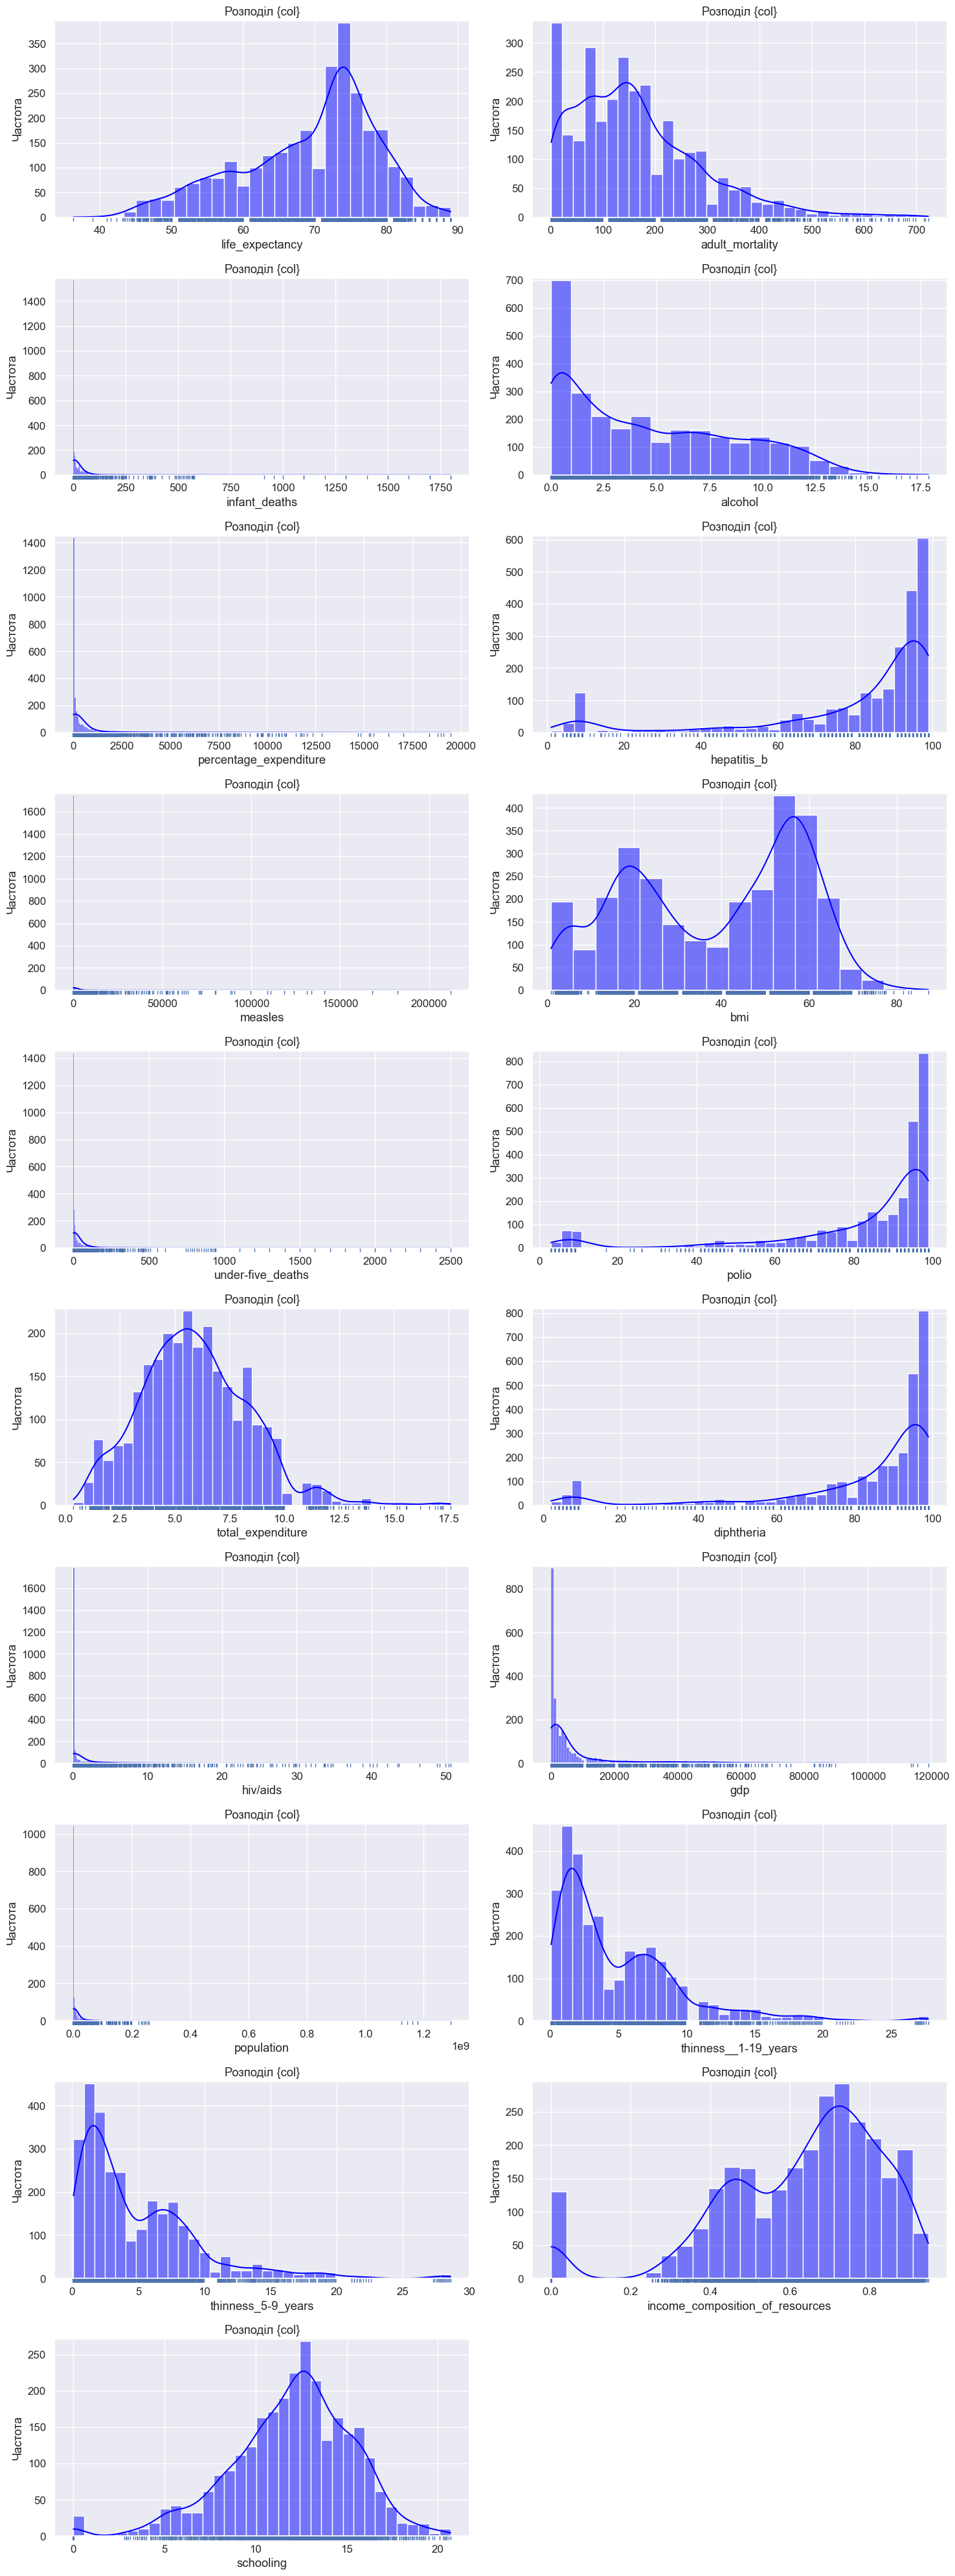

In [22]:
num_cols = 2 
num_rows = (len(df.columns[3:]) + num_cols - 1) // num_cols
sns.set(font_scale=1.1)
plt.figure(figsize = (15, 40))
for i, col in enumerate(df.columns[3:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde = True, color = 'blue')
    plt.title('Розподіл {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    sns.rugplot(data = df[col], height = -0.02, clip_on = False)
    

plt.tight_layout()
plt.show()

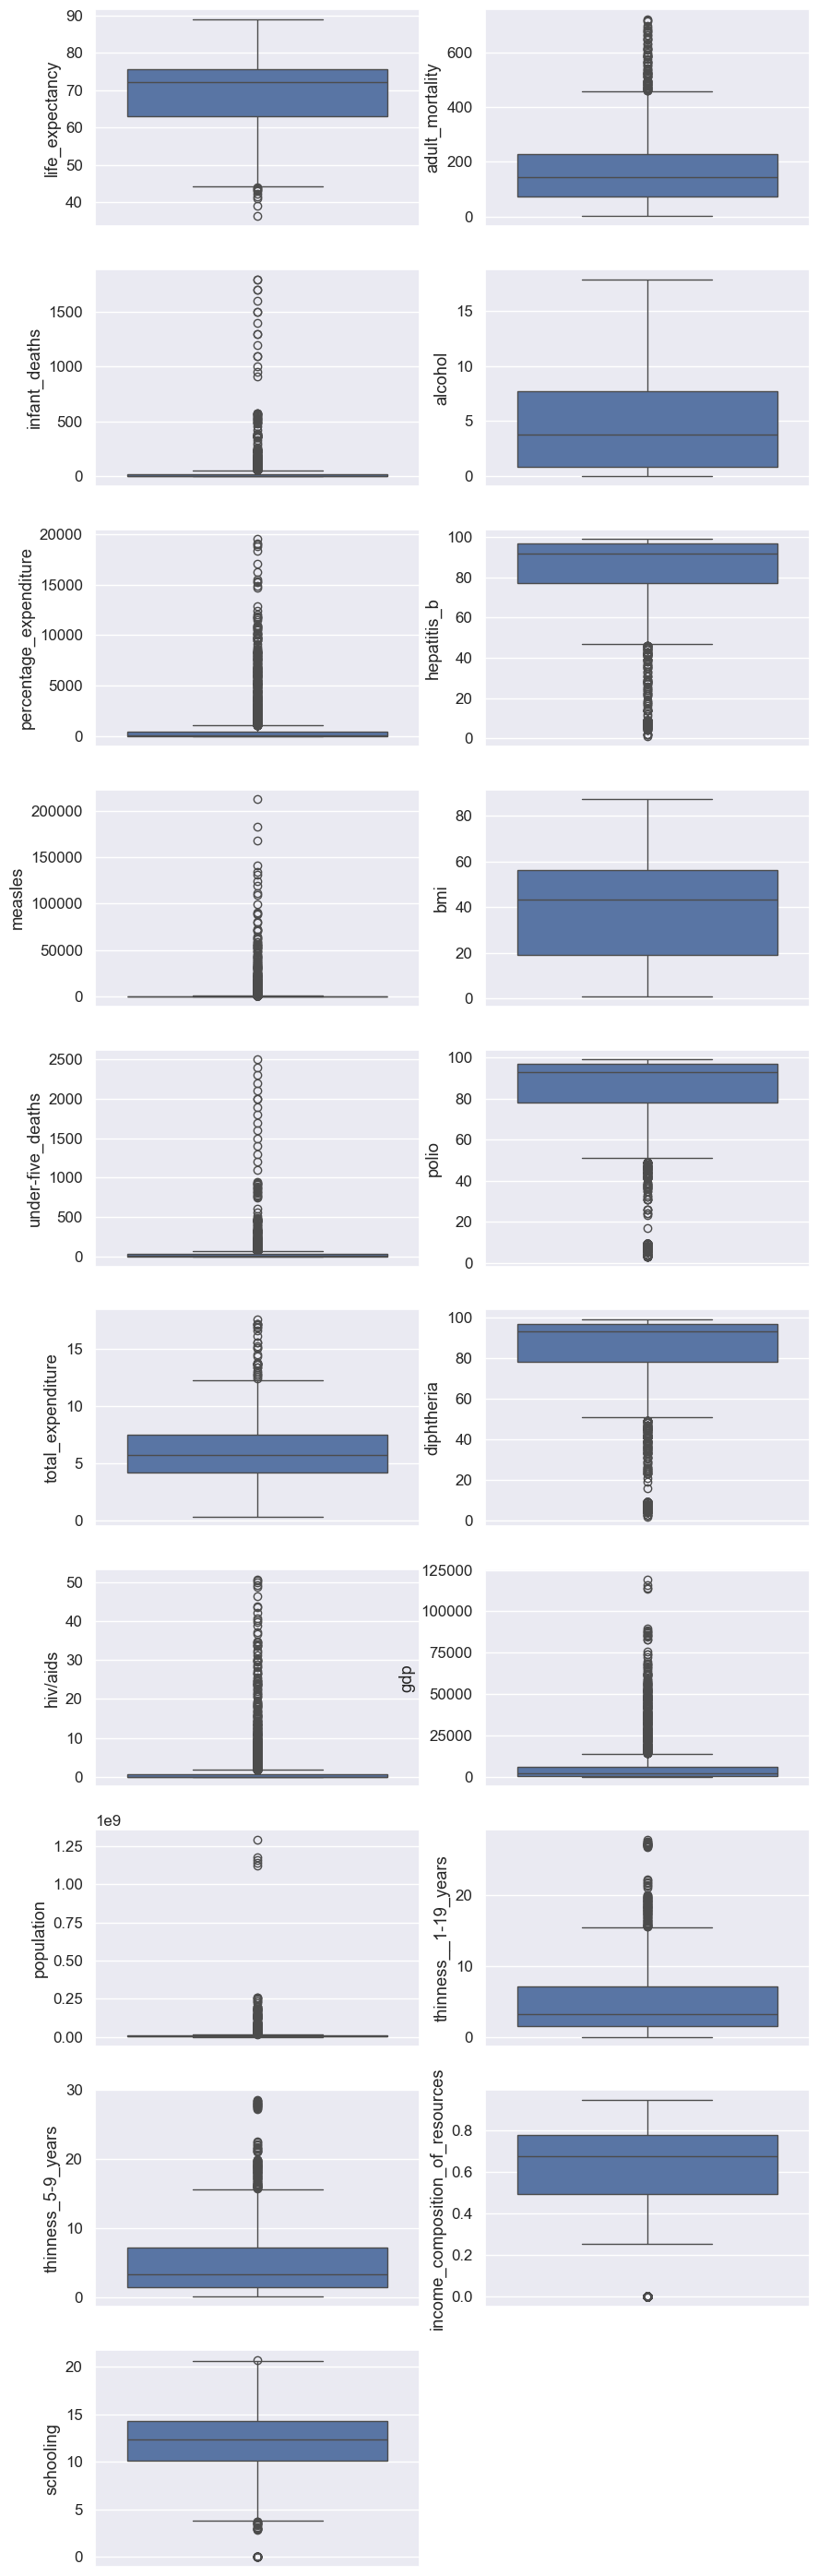

In [23]:
plt.figure(figsize = (10, 36))

for i, col in enumerate(df.columns[3:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y = col, data = df)

**Рахуємо дисперсію**

In [24]:
variance = df[df.columns[3:]].var()
print(variance)

life_expectancy                    9.070405e+01
adult_mortality                    1.544852e+04
infant_deaths                      1.390666e+04
alcohol                            1.642205e+01
percentage_expenditure             3.951805e+06
hepatitis_b                        6.285057e+02
measles                            1.314983e+08
bmi                                4.017633e+02
under-five_deaths                  2.574277e+04
polio                              5.488733e+02
total_expenditure                  6.241601e+00
diphtheria                         5.624919e+02
hiv/aids                           2.578390e+01
gdp                                2.036377e+08
population                         3.722476e+15
thinness__1-19_years               1.953812e+01
thinness_5-9_years                 2.033002e+01
income_composition_of_resources    4.448031e-02
schooling                          1.128234e+01
dtype: float64


**Рахуємо коваріацію**

In [25]:
covariance = df[df.columns[3:]].cov()
#print(covariance)
covariance

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,9.070405e+01,-8.243093e+02,-2.211084e+02,1.566435e+01,7.240651e+03,5.412236e+01,-1.723845e+04,1.075074e+02,-3.405787e+02,1.035024e+02,5.161025e+00,1.079214e+02,-2.695626e+01,6.357257e+04,-1.292010e+07,-2.001529e+01,-2.017765e+01,1.431375,2.355586e+01
adult_mortality,-8.243093e+02,1.544852e+04,1.156193e+03,-9.939165e+01,-6.009727e+04,-4.804433e+02,4.450792e+04,-9.569895e+02,1.880456e+03,-7.980218e+02,-3.591276e+01,-8.088108e+02,3.311031e+02,-5.339286e+05,-1.074510e+08,1.658953e+02,1.723295e+02,-11.871124,-1.870545e+02
infant_deaths,-2.211084e+02,1.156193e+03,1.390666e+04,-5.627989e+01,-2.006989e+04,-5.866675e+02,6.776735e+05,-5.402210e+02,1.885700e+04,-4.730680e+02,-3.881121e+01,-4.914787e+02,1.510865e+01,-1.957971e+05,4.474351e+09,2.441097e+02,2.520228e+02,-3.679185,-7.815589e+01
alcohol,1.566435e+01,-9.939165e+01,-5.627989e+01,1.642205e+01,2.831145e+03,8.836352e+00,-2.454997e+03,2.675036e+01,-7.452989e+01,2.098374e+01,3.008681e+00,2.139245e+01,-1.035875e+00,2.065329e+04,-8.960531e+06,-7.731591e+00,-7.677407e+00,0.379128,7.216164e+00
percentage_expenditure,7.240651e+03,-6.009727e+04,-2.006989e+04,2.831145e+03,3.951805e+06,6.460541e+02,-1.290153e+06,9.159427e+03,-2.802068e+04,6.877983e+03,8.964324e+02,6.790915e+03,-9.877866e+02,2.736831e+07,-3.389285e+09,-2.220087e+03,-2.278469e+03,164.211694,2.666523e+03
hepatitis_b,5.412236e+01,-4.804433e+02,-5.866675e+02,8.836352e+00,6.460541e+02,6.285057e+02,-2.881926e+04,7.520121e+01,-8.233259e+02,2.654561e+02,3.628483e+00,3.288785e+02,-1.446941e+01,2.681937e+04,-2.143913e+08,-1.292948e+01,-1.358915e+01,0.906997,1.643195e+01
measles,-1.723845e+04,4.450792e+04,6.776735e+05,-2.454997e+03,-1.290153e+06,-2.881926e+04,1.314983e+08,-4.067260e+04,9.343034e+05,-3.669537e+04,-3.118151e+03,-3.870720e+04,1.799181e+03,-1.209813e+07,1.873944e+11,1.145815e+04,1.149380e+04,-288.290230,-4.859362e+03
bmi,1.075074e+02,-9.569895e+02,-5.402210e+02,2.675036e+01,9.159427e+03,7.520121e+01,-4.067260e+04,4.017633e+02,-7.685319e+02,1.332090e+02,1.210224e+01,1.343270e+02,-2.493284e+01,8.628256e+04,-8.838424e+07,-4.713661e+01,-4.870468e+01,2.100044,3.539356e+01
under-five_deaths,-3.405787e+02,1.880456e+03,1.885700e+04,-7.452989e+01,-2.802068e+04,-8.233259e+02,9.343034e+05,-7.685319e+02,2.574277e+04,-7.116265e+02,-5.351628e+01,-7.469237e+02,3.100902e+01,-2.751755e+05,5.947125e+09,3.335774e+02,3.435245e+02,-5.628414,-1.148498e+02
polio,1.035024e+02,-7.980218e+02,-4.730680e+02,2.098374e+01,6.877983e+03,2.654561e+02,-3.669537e+04,1.332090e+02,-7.116265e+02,5.488733e+02,7.926017e+00,3.742538e+02,-1.903485e+01,7.053131e+04,-5.669602e+07,-2.289783e+01,-2.343929e+01,1.814039,3.134277e+01


**Рахуємо кореляцію**

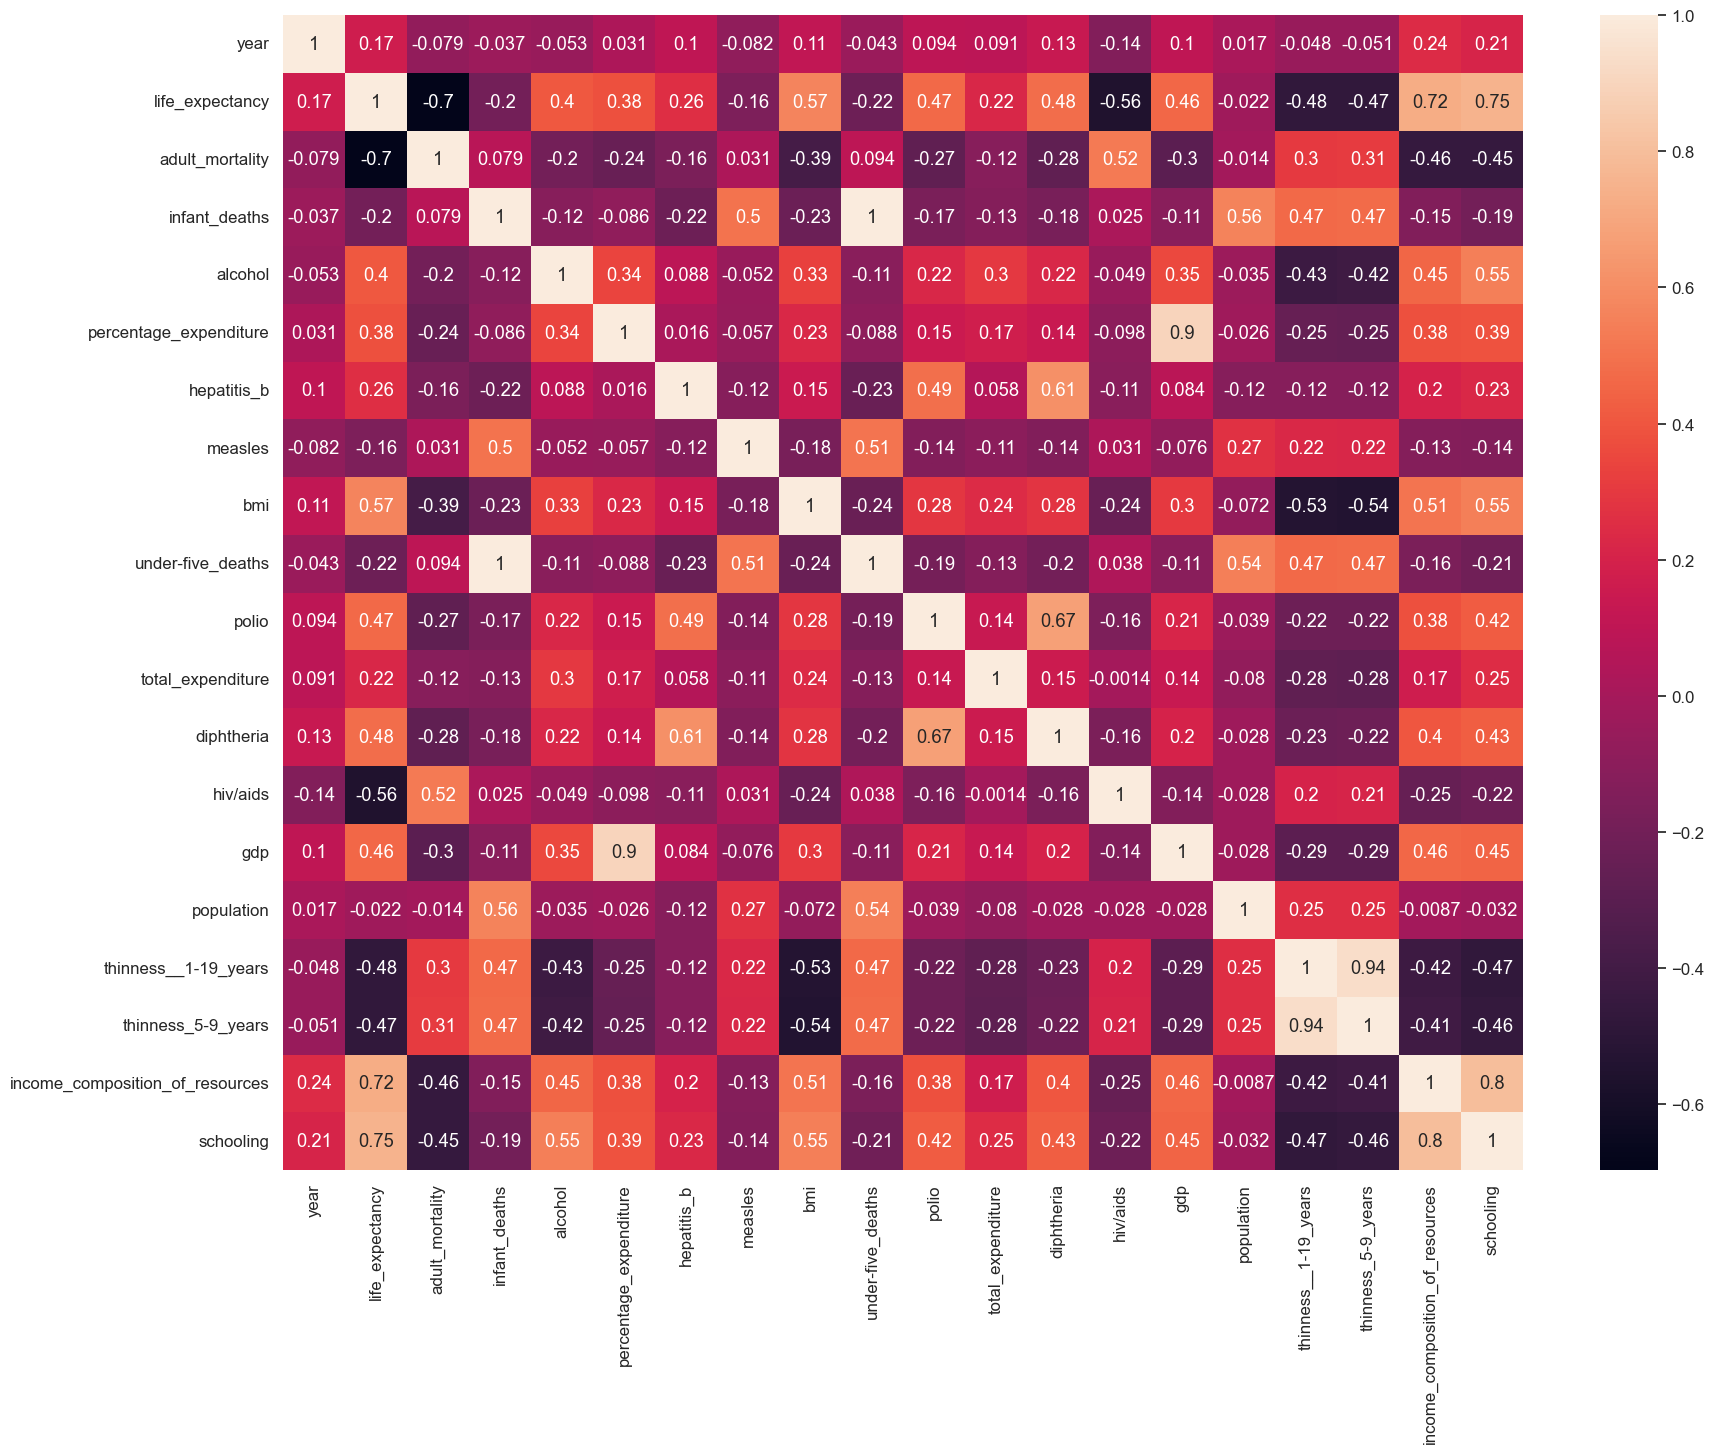

In [26]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Чи справді різні фактори прогнозування, які були обрані спочатку, впливають на очікувану тривалість життя? Які передбачувані змінні насправді впливають на тривалість життя?

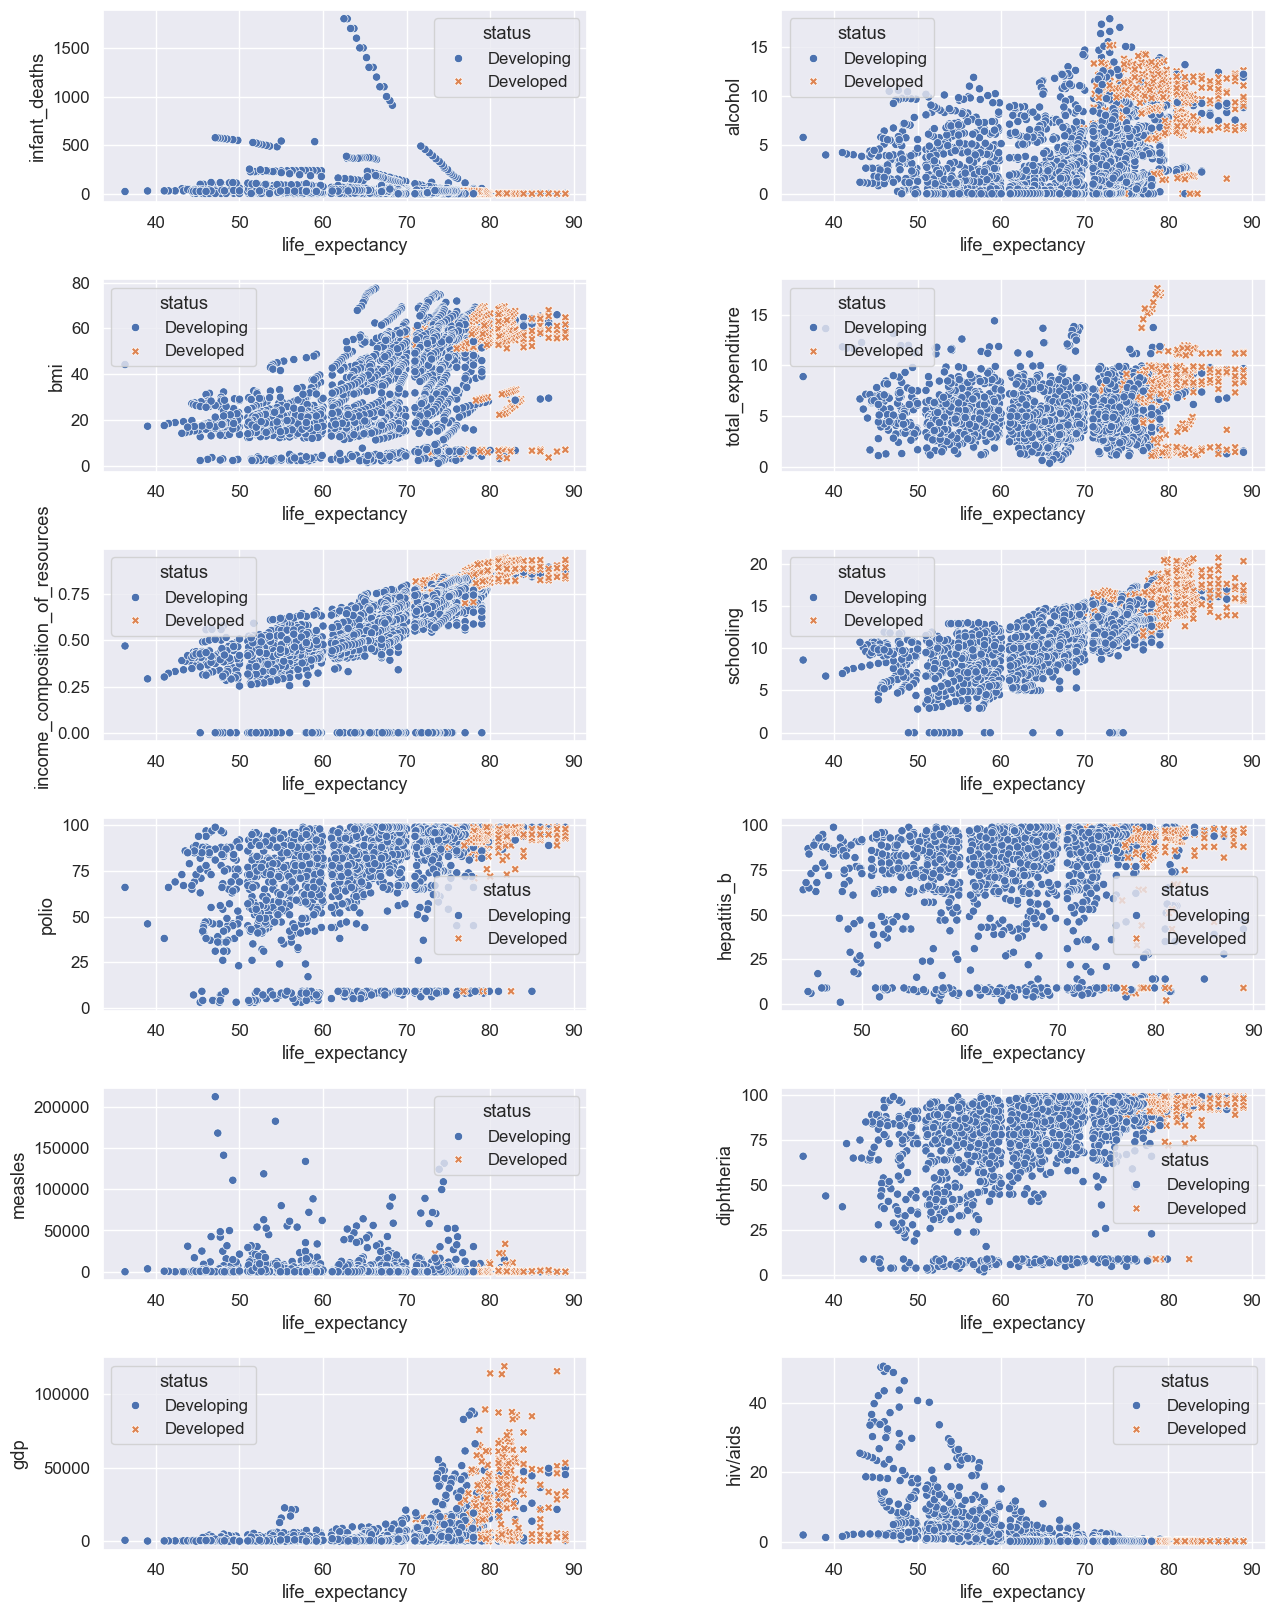

In [27]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

factors = ['infant_deaths', 'alcohol', 
           'bmi', 'total_expenditure', 
           'income_composition_of_resources', 'schooling',
           'polio', 'hepatitis_b',
           'measles', 'diphtheria',
           'gdp', 'hiv/aids']

for i, col in enumerate(factors, 1):
    plt.subplot(6, 2, i)
    dc6 = df.dropna(subset = ['life_expectancy', col])
    sns.scatterplot(data = dc6, x = "life_expectancy", y = col, hue = "status", style = "status")


**На цій діаграмі розсіювання видно, що фактори впливають на очікувану тривалість життя.  
Так наприклад чим чим більший показник ВВП, загальник витрат на охорону здоров'я, тим більша тривалість життя.**

### Чи повинна країна з нижчим значенням очікуваної тривалості життя (<65) збільшити витрати на охорону здоров’я, щоб покращити середню тривалість життя?

In [28]:
low_life_expectancy_data = df[df['life_expectancy'] <= 65]
correlation_low_life = low_life_expectancy_data[['total_expenditure', 'life_expectancy']].corr()
print(correlation_low_life)

                   total_expenditure  life_expectancy
total_expenditure           1.000000        -0.151574
life_expectancy            -0.151574         1.000000


**З результату видно, що між тривалістю життя та витратами охорони здоров'я - від'ємна кореляція, тобто зворотній зв'язок. Це означає що, згідно кореляційного аналізу, чим більше витрати на охорону здоров'я, тим менша тривалість життя. Це звучить доволі нелогічно, але значення доволі маленьке і це значення може бути отримане впливом інших факторів.**

### Як рівень дитячої та дорослої смертності впливає на тривалість життя?
**З результатів видно, що кореляція між смертністю серед дорослих ('adult_mortality') та тривалістю життя - від'ємний та дорівнює -0,7. Це означає, що чим більший показник смертності тим менша тривалість життя і при чому суттєво.**

**З результатів видно, що кореляція між смертністю серед дитей ('infant_death') та тривалістю життя - від'ємний та дорівнює -0,2. Це означає, що чим більший показник смертності тим менша тривалість життя, але не суттєво.** 

### Чи має очікувана тривалість життя позитивну чи негативну кореляцію зі звичками в їжі, способом життя, фізичними вправами, курінням, вживанням алкоголю тощо.

**Очікувана тривалість життя має позитивну кореляцію з індексом маси тіла(BMI) і становить 0.57, що є доволі сильно впливає на тривалість життя.**

**Очікувана тривалість життя має позитивну кореляцію з рівнем вживання алкоголю(Alcohol) і становить 0.4, що також доволі сильно впливає на тривалість життя.**
**Це звучить не логічно, такі результати можна виправдати через вибірку данних, а також впливом інших факторів.**

### Який вплив навчання в школі на тривалість життя людини?
**Очікувана тривалість життя має позитивну кореляцію з навчанням(schooling) та становить 0.21. З цього можна зробити висновок, що навчання позитивно впливає на очікувану тривалість життя, але не суттєво.**

### Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?
**Очікувана тривалість життя має позитивну кореляцію з рівнем вживання алкоголю(Alcohol) і становить 0.4, що також доволі сильно впливає на тривалість життя.**
**Це звучить не логічно, такі результати можна виправдати через вибірку данних, а також впливом інших факторів.**

### Чи зазвичай у густонаселених країнах тривалість життя нижча?

**Очікувана тривалість життя має від'ємну кореляцію з фактором населення(population) та становить -0.022. З цього можна зробити висновок, що чим більше населення, тим менша очікувана тривалість життя, однак це значення дуже маленьке, що означає що цей фактор не сильно впливає.**

### Який вплив охоплення імунізацією на очікувану тривалість життя?
**З результатів видно, що при імунізації від хвороб гепатит Б, поліомієліт, дифтерія значення кореляції позитивне і впливає на очікувану тривалість життя, тобто чим більший показник імунізації тим більша очікувана тривалість життя, а для кіру - від'ємне, але це значення становить маленьке значення, що може бути спричинене впливом інших факторів.**